## Installs and Imports

In [1]:
# !pip uninstall scikit-learn

In [2]:
# Core libraries
!pip install numpy pandas matplotlib scipy openpyxl

# Machine learning libraries
!pip install scikit-learn keras tensorflow scikeras

# Visualization 
!pip install seaborn


[notice] A new release of pip is available: 24.0 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.0 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.0 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.signal import savgol_filter
from sklearn.cross_decomposition import PLSRegression
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Input
from scikeras.wrappers import KerasRegressor
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, KFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA

## Exploratory Data Analysis.

In [4]:
df = pd.read_excel("NIR_Data.xlsx")
df

,Sample ID,Unnamed: 1,11988.51,11980.8,11973.08,11965.37,11957.66,11949.94,11942.23,11934.51,...,4057.888,4050.173,4042.459,4034.744,4027.03,4019.315,4011.601,4003.886,3996.171,Moisture
0,3001RanBioMixMalarenergi.0,1,0.430391,0.430351,0.430570,0.430974,0.431129,0.430807,0.430425,0.430264,...,1.042346,1.052940,1.062511,1.070474,1.077419,1.082571,1.084933,1.086961,1.088756,24.933532
1,3001RanBioMixMalarenergi.1,2,0.418378,0.418387,0.418783,0.418983,0.418721,0.418339,0.417951,0.417494,...,1.017335,1.027128,1.036592,1.043992,1.049032,1.051711,1.052812,1.054065,1.055364,24.933532
2,3001RanBioMixMalarenergi.2,3,0.446782,0.446930,0.446840,0.446419,0.446009,0.445715,0.445539,0.445537,...,1.053265,1.061849,1.070649,1.079960,1.088810,1.094708,1.098719,1.100796,1.099144,24.933532
3,3001RanBioMixMalarenergi.3,4,0.434038,0.433805,0.433692,0.433850,0.433912,0.433757,0.433515,0.433327,...,1.020629,1.029372,1.038613,1.047470,1.053009,1.054695,1.054589,1.053924,1.053708,24.933532
4,3001RanBioMixMalarenergi.4,5,0.451491,0.451441,0.451692,0.451816,0.451755,0.451595,0.451293,0.451114,...,1.013404,1.023107,1.030855,1.036464,1.042622,1.049984,1.055300,1.055122,1.052386,24.933532
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
768,3154RanBioMixMalarenergi.1,945,0.340521,0.340076,0.339782,0.339961,0.340233,0.340201,0.339958,0.339772,...,1.012959,1.023482,1.032525,1.040089,1.044798,1.047819,1.047905,1.046299,1.045034,39.039775
769,3154RanBioMixMalarenergi.2,946,0.369337,0.368663,0.367986,0.367705,0.367920,0.368156,0.368237,0.368364,...,0.958066,0.967192,0.973893,0.978803,0.982503,0.985984,0.987628,0.988656,0.987488,39.039775
770,3154RanBioMixMalarenergi.3,947,0.414796,0.414180,0.413598,0.413055,0.413093,0.413714,0.414176,0.414099,...,1.037804,1.047028,1.054885,1.060705,1.066238,1.071721,1.073868,1.073359,1.073496,39.039775
771,3154RanBioMixMalarenergi.4,948,0.353829,0.353229,0.352726,0.352591,0.352698,0.352684,0.352596,0.352764,...,1.089022,1.099540,1.110634,1.119961,1.126208,1.130563,1.136066,1.142062,1.143006,39.039775


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 773 entries, 0 to 772
Columns: 1040 entries, Sample ID to Moisture
dtypes: float64(1038), int64(1), object(1)
memory usage: 6.1+ MB


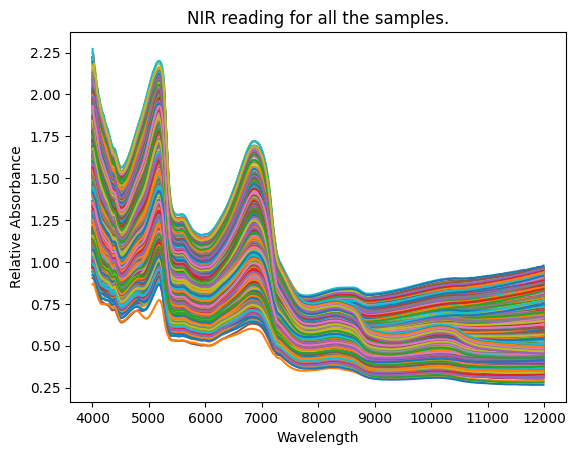

In [6]:
for i in range(len(df)):
    plt.plot(df.iloc[i][2:-2])

plt.xlabel('Wavelength')
plt.ylabel('Relative Absorbance')
plt.title('NIR reading for all the samples.')
plt.show()

In [7]:
df.info()
print("Number of total NAN values in the dataset: ", df.isna().sum().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 773 entries, 0 to 772
Columns: 1040 entries, Sample ID to Moisture
dtypes: float64(1038), int64(1), object(1)
memory usage: 6.1+ MB
Number of total NAN values in the dataset:  0


The dataset contains no missing values.

In [8]:
df_avg = df.groupby(df['Sample ID'].str[:4]).mean(numeric_only=True)
df_avg

,Unnamed: 1,11988.51,11980.8,11973.08,11965.37,11957.66,11949.94,11942.23,11934.51,11926.8,...,4057.888,4050.173,4042.459,4034.744,4027.03,4019.315,4011.601,4003.886,3996.171,Moisture
Sample ID,,,,,,,,,,,,,,,,,,,,,
3001,4.5,0.438562,0.438490,0.438557,0.438652,0.438637,0.438431,0.438067,0.437798,0.437836,...,1.031253,1.040630,1.049623,1.057915,1.065065,1.069776,1.072137,1.073081,1.072896,24.933532
3002,11.5,0.434417,0.434342,0.434268,0.434148,0.433908,0.433488,0.432979,0.432671,0.432751,...,1.122671,1.133563,1.143732,1.151855,1.157445,1.163371,1.169359,1.173944,1.175945,30.621476
3003,17.5,0.412196,0.412227,0.412117,0.411963,0.411795,0.411519,0.411284,0.411268,0.411399,...,1.020561,1.030188,1.038720,1.046485,1.053678,1.060021,1.063745,1.065173,1.066238,26.258175
3004,23.5,0.391896,0.391889,0.391864,0.391856,0.391696,0.391252,0.390815,0.390717,0.390978,...,1.001719,1.010819,1.018953,1.026387,1.033374,1.039200,1.043996,1.046730,1.046339,26.091323
3005,29.5,0.443290,0.443129,0.443102,0.443219,0.443297,0.443240,0.443187,0.443196,0.443106,...,1.060075,1.069937,1.080015,1.089438,1.096453,1.101330,1.105046,1.106902,1.105657,24.506975
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3135,832.5,0.466602,0.466551,0.466365,0.466267,0.466506,0.467002,0.467496,0.467889,0.468247,...,2.049313,2.063894,2.077557,2.094277,2.107150,2.107683,2.109332,2.125977,2.144929,71.360682
3137,844.5,0.330281,0.330072,0.329863,0.329776,0.329904,0.330161,0.330352,0.330329,0.330217,...,0.983823,0.994506,1.003896,1.011150,1.016108,1.018976,1.021349,1.024210,1.025424,27.437021
3144,886.5,0.347778,0.347539,0.347305,0.347153,0.347264,0.347611,0.347848,0.347786,0.347787,...,1.017439,1.029016,1.039274,1.047608,1.054403,1.059708,1.062785,1.063810,1.063032,30.157104


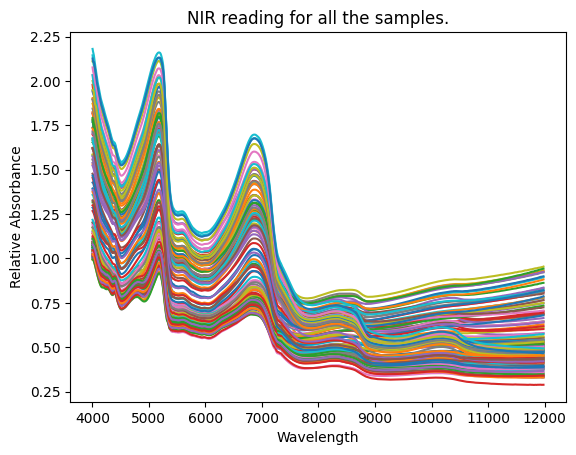

In [9]:
for i in range(len(df_avg)):
    plt.plot(df_avg.iloc[i][2:-2])

plt.xlabel('Wavelength')
plt.ylabel('Relative Absorbance')
plt.title('NIR reading for all the samples.')
plt.show()

There seems to be a natural progression or distribution of absorption data, with no obvious outliers visually.

## Outlier Detection.

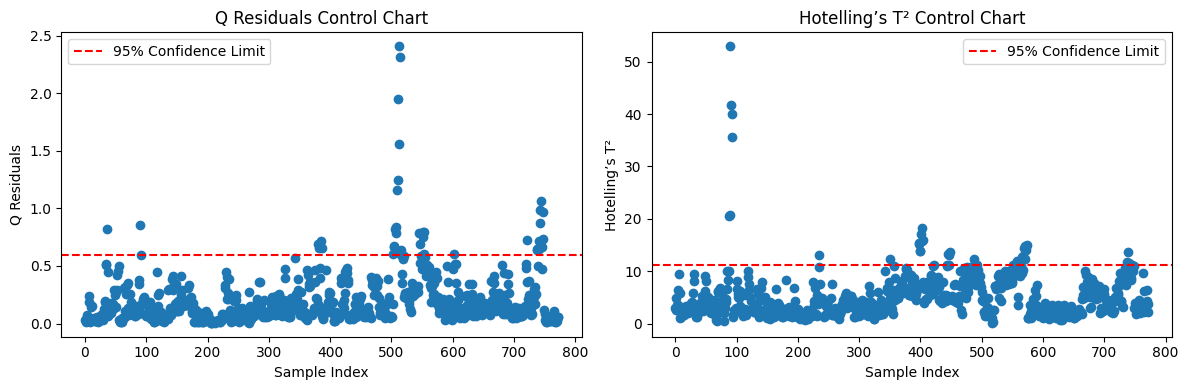

Outliers detected: [ 36  88  89  90  91  92  93 235 350 381 382 385 386 397 398 399 400 401
 402 403 404 422 443 445 446 447 448 487 493 503 504 505 506 507 508 509
 510 511 512 513 514 515 516 545 546 551 552 553 554 558 566 568 569 570
 571 572 573 574 602 722 737 738 739 740 741 742 743 744 745 746 747 748]


In [10]:
# Extract spectral data (exclude 'Sample ID' and 'Moisture' columns)
spectral_data = df.iloc[:, 2:-1].values  # Exclude the first and last columns

# Standardize the spectral data
scaler = StandardScaler()
spectral_data_scaled = scaler.fit_transform(spectral_data)

# Perform PCA
pca = PCA(n_components=5)  # Use 5 principal components (adjust as needed)
scores = pca.fit_transform(spectral_data_scaled)

# Calculate residuals
residuals = spectral_data_scaled - pca.inverse_transform(scores)

# Q residuals (sum of squared residuals)
Q = np.sum(residuals**2, axis=1)

# Hotelling’s T² (sum of squared scores, weighted by explained variance)
T2 = np.sum((scores / np.std(scores, axis=0))**2, axis=1)

# Plot control charts for Q residuals and Hotelling’s T²
plt.figure(figsize=(12, 4))

# Q Residuals
plt.subplot(1, 2, 1)
plt.plot(Q, 'o')
plt.axhline(np.percentile(Q, 95), color='r', linestyle='--', label='95% Confidence Limit')
plt.xlabel('Sample Index')
plt.ylabel('Q Residuals')
plt.title('Q Residuals Control Chart')
plt.legend()

# Hotelling’s T²
plt.subplot(1, 2, 2)
plt.plot(T2, 'o')
plt.axhline(np.percentile(T2, 95), color='r', linestyle='--', label='95% Confidence Limit')
plt.xlabel('Sample Index')
plt.ylabel('Hotelling’s T²')
plt.title('Hotelling’s T² Control Chart')
plt.legend()

plt.tight_layout()
plt.show()

# Identify outliers
outliers_Q = np.where(Q > np.percentile(Q, 95))[0]
outliers_T2 = np.where(T2 > np.percentile(T2, 95))[0]

# Combine outliers from both metrics
outliers = np.union1d(outliers_Q, outliers_T2)

print(f"Outliers detected: {outliers}")

33    3006RanBioMixMalarenergi.1
34    3006RanBioMixMalarenergi.2
35    3006RanBioMixMalarenergi.3
36    3006RanBioMixMalarenergi.4
37    3006RanBioMixMalarenergi.5
Name: Sample ID, dtype: object


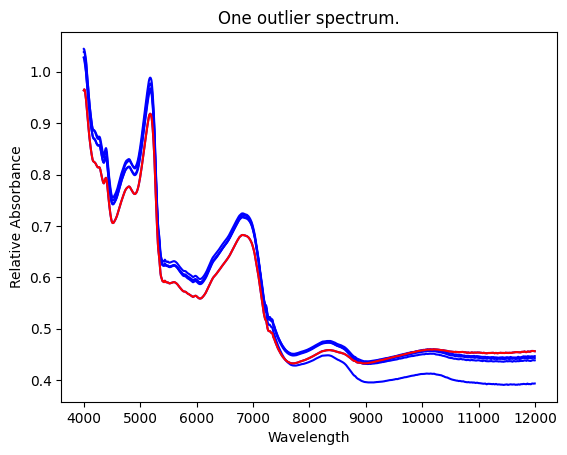

88    3015RanBioMixMalarenergi.0
89    3015RanBioMixMalarenergi.1
90    3015RanBioMixMalarenergi.2
91    3015RanBioMixMalarenergi.3
92    3015RanBioMixMalarenergi.4
93    3015RanBioMixMalarenergi.5
Name: Sample ID, dtype: object


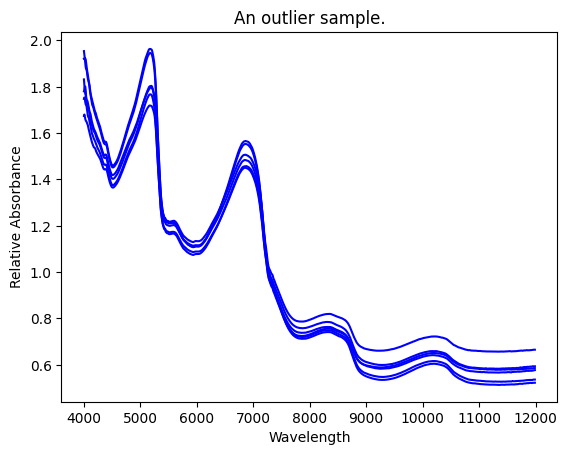

In [11]:
print(df.iloc[33:38]['Sample ID'])

for i in range(33,38):
    plt.plot(df.iloc[i][2:-2], color='blue')
plt.plot(df.iloc[36][2:-2], color='red')    

plt.xlabel('Wavelength')
plt.ylabel('Relative Absorbance')
plt.title('One outlier spectrum.')
plt.show()


print(df.iloc[88:94]['Sample ID'])

for i in range(88,94):
    plt.plot(df.iloc[i][2:-2], color='blue')

plt.xlabel('Wavelength')
plt.ylabel('Relative Absorbance')
plt.title('An outlier sample.')
plt.show()

In [12]:
# Convert the NumPy array of outlier indices to a list
outlier_indices = [36, 235, 350, 422, 487, 493, 545, 546, 558, 602, 722]

# Drop the outliers and reset the index
df_cleaned = df.drop(outlier_indices).reset_index(drop=True)

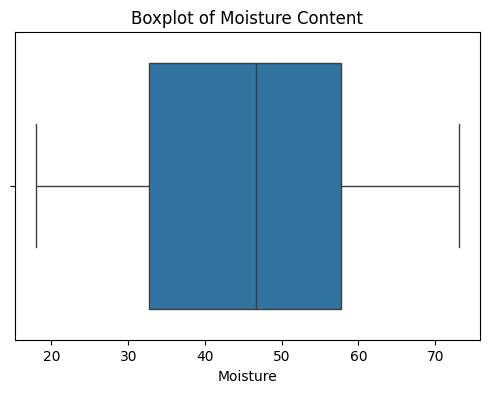

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

# Boxplot for Moisture
plt.figure(figsize=(6, 4))
sns.boxplot(x=df_cleaned['Moisture'])
plt.title('Boxplot of Moisture Content')
plt.show()

## Advanced Pre-processing.

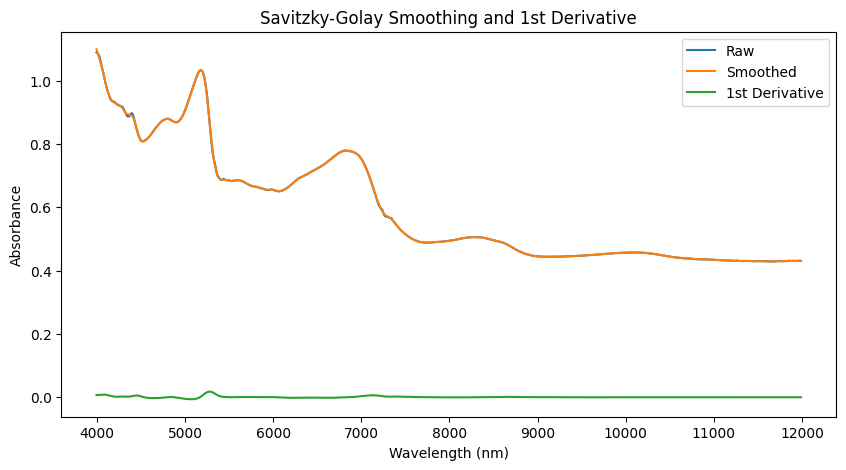

In [14]:
# Extract spectral data (exclude 'Sample ID', index and 'Moisture' columns)
spectral_data = df.iloc[:, 2:-1].values  # Exclude the first and last columns

# Extract wavelengths
wavelengths = df.columns[2:-1].astype(float)  # Convert to float for plotting

# Apply Savitzky-Golay smoothing
window_length = 21  
polyorder = 2  
smoothed = savgol_filter(spectral_data, window_length=window_length, polyorder=polyorder, deriv=0)

# Apply 1st derivative
derivative1 = savgol_filter(spectral_data, window_length=window_length, polyorder=polyorder, deriv=1)

# Plot comparison for the first sample
plt.figure(figsize=(10, 5))
plt.plot(wavelengths, spectral_data[0], label='Raw')
plt.plot(wavelengths, smoothed[0], label='Smoothed')
plt.plot(wavelengths, derivative1[0], label='1st Derivative')
plt.xlabel('Wavelength (nm)')
plt.ylabel('Absorbance')
plt.title('Savitzky-Golay Smoothing and 1st Derivative')
plt.legend()
plt.show()

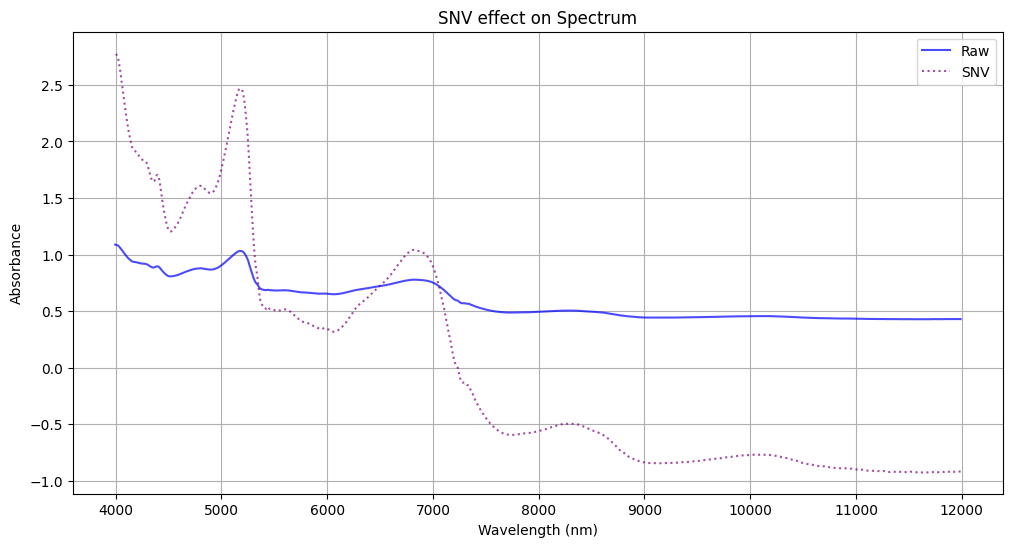

In [22]:
# Apply Standard Normal Variate (SNV)
def snv(input_data):
    """
    Apply Standard Normal Variate (SNV) normalization to the input data.
    """
    return (input_data - np.mean(input_data, axis=1, keepdims=True)) / np.std(input_data, axis=1, keepdims=True)

spectral_data_snv = snv(spectral_data)

# Plot comparison for the first sample
plt.figure(figsize=(12, 6))
plt.plot(wavelengths, spectral_data[0], label='Raw', color='blue', linestyle='-', alpha=0.7)
plt.plot(wavelengths, spectral_data_snv[0], label='SNV', color='purple', linestyle=':', alpha=0.7)
plt.xlabel('Wavelength (nm)')
plt.ylabel('Absorbance')
plt.title('SNV effect on Spectrum')
plt.legend()
plt.grid(True)
plt.show()

## Model Training and Evaluation.

In [15]:
class NIRPreprocessor:
    def __init__(self, window_length=21, polyorder=2, apply_sg=True, apply_snv=False, apply_derivative=None):
        """
        Parameters:
        - window_length: Savitzky-Golay window size.
        - polyorder: Polynomial order for Savitzky-Golay.
        - apply_sg: Whether to apply Savitzky-Golay smoothing.
        - apply_snv: Whether to apply Standard Normal Variate (SNV).
        - apply_derivative: None, 1 (1st derivative), or 2 (2nd derivative).
        """
        self.window_length = window_length
        self.polyorder = polyorder
        self.apply_sg = apply_sg
        self.apply_snv = apply_snv
        self.apply_derivative = apply_derivative

    def _savitzky_golay(self, X, derivative=0):
        return savgol_filter(X, self.window_length, self.polyorder, deriv=derivative)

    def _snv(self, X):
        return (X - np.mean(X, axis=1, keepdims=True)) / np.std(X, axis=1, keepdims=True)

    def preprocess(self, X):
        if self.apply_sg:
            X = self._savitzky_golay(X, derivative=0)  # Smoothing
        if self.apply_derivative is not None:
            X = self._savitzky_golay(X, derivative=self.apply_derivative)  # 1st or 2nd derivative
        if self.apply_snv:
            X = self._snv(X)
        return X

In [16]:
def build_pls_model(n_components=10):
    pipeline = Pipeline([
        ('scaler', StandardScaler()),
        ('pls', PLSRegression(n_components=n_components))
    ])
    return pipeline

def build_svr_model(C=100, gamma=0.1, kernel='rbf'):
    pipeline = Pipeline([
        ('scaler', StandardScaler()),
        ('svr', SVR(C=C, gamma=gamma, kernel=kernel))
    ])
    return pipeline

def build_ann_model(input_dim, hidden_units=64, dropout_rate=0.2, learning_rate=0.001):
    model = Sequential([
        Input(shape=(input_dim,)),  # Explicit Input layer
        Dense(hidden_units, activation='relu'),  # Remove input_shape from here
        Dropout(dropout_rate),
        Dense(1)
    ])
    model.compile(optimizer=Adam(learning_rate=learning_rate), loss='mse')
    return model

# # Define the ANN model
# def build_ann_model(input_dim, hidden_units=64, dropout_rate=0.2, learning_rate=0.001):
#     model = Sequential([
#         Dense(hidden_units, activation='relu', input_shape=(input_dim,)),
#         Dropout(dropout_rate),
#         Dense(1)
#     ])
#     model.compile(optimizer=Adam(learning_rate=learning_rate), loss='mse')
#     return model

In [17]:
# Manual hyperparameter tuning for ANN
def tune_ann_model(X_train, y_train, param_grid, cv=5):
    best_score = float('inf')
    best_params = None
    best_model = None
    
    for hidden_units in param_grid['hidden_units']:
        for learning_rate in param_grid['learning_rate']:
            cv_scores = []
            
            # Perform cross-validation
            kf = KFold(n_splits=cv)
            for train_idx, val_idx in kf.split(X_train):
                X_train_fold, X_val_fold = X_train[train_idx], X_train[val_idx]
                y_train_fold, y_val_fold = y_train[train_idx], y_train[val_idx]
                
                # Build and train the model
                model = build_ann_model(X_train.shape[1], hidden_units=hidden_units, learning_rate=learning_rate)
                model.fit(X_train_fold, y_train_fold, epochs=100, batch_size=32, verbose=0)
                
                # Evaluate the model
                y_pred = model.predict(X_val_fold).flatten()
                score = np.sqrt(mean_squared_error(y_val_fold, y_pred))
                cv_scores.append(score)
            
            # Calculate the average RMSE across folds
            avg_score = np.mean(cv_scores)
            
            # Update the best model
            if avg_score < best_score:
                best_score = avg_score
                best_params = {'hidden_units': hidden_units, 'learning_rate': learning_rate}
                best_model = model
    
    return best_model, best_params, best_score

In [18]:
def plot_results(y_true, y_pred, model_name, title):
    plt.figure(figsize=(8, 6))
    plt.scatter(y_true, y_pred, alpha=0.5)
    plt.plot([y_true.min(), y_true.max()], [y_true.min(), y_true.max()], 'k--')
    plt.xlabel('True Moisture')
    plt.ylabel('Predicted Moisture')
    plt.title(f'{model_name}_{title} - Actual vs Predicted')
    plt.show()
def evaluate_models(X, y, preprocessor, title):
    # Train-test split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    # Model configurations
    models = {
        'PLS': {
            'model': build_pls_model(),
            'params': {'pls__n_components': [5, 10, 15]}
        },
        'SVR': {
            'model': build_svr_model(),
            'params': {'svr__C': [1, 10, 100], 'svr__gamma': [0.01, 0.1, 1]}
        },
        'ANN': {
            'model': None,  # ANN is handled separately
            'params': {'hidden_units': [32, 64], 'learning_rate': [0.001, 0.01]}
        }
    }

    results = []
    
    for model_name, config in models.items():
        if model_name == 'ANN':
            # Manual hyperparameter tuning for ANN
            best_model, best_params, best_score = tune_ann_model(X_train, y_train, config['params'])
            y_pred = best_model.predict(X_test).flatten()
            rmse_cv = best_score
            r2_cv = r2_score(y_train, best_model.predict(X_train).flatten())
            rmse_test = np.sqrt(mean_squared_error(y_test, y_pred))
            r2_test = r2_score(y_test, y_pred)
        else:
            # Use GridSearchCV for PLS and SVR
            grid = GridSearchCV(config['model'], config['params'], 
                              cv=5, scoring='neg_root_mean_squared_error',
                              refit=True, n_jobs=-1)
            grid.fit(X_train, y_train)
            
            # Best model evaluation
            best_model = grid.best_estimator_
            y_pred = best_model.predict(X_test)
            
            # Metrics
            rmse_cv = -grid.best_score_
            r2_cv = r2_score(y_train, grid.predict(X_train))
            rmse_test = np.sqrt(mean_squared_error(y_test, y_pred))
            r2_test = r2_score(y_test, y_pred)
            best_params = grid.best_params_
        
        results.append({
            'Preprocessing': preprocessor.__class__.__name__,
            'Model': model_name,
            'RMSECV': rmse_cv,
            'R2CV': r2_cv,
            'RMSE_test': rmse_test,
            'R2_test': r2_test,
            'Best Params': best_params
        })
        
        # Plot results
        plot_results(y_test, y_pred, f"{model_name} ({preprocessor.__class__.__name__})", title)
    
    return pd.DataFrame(results)

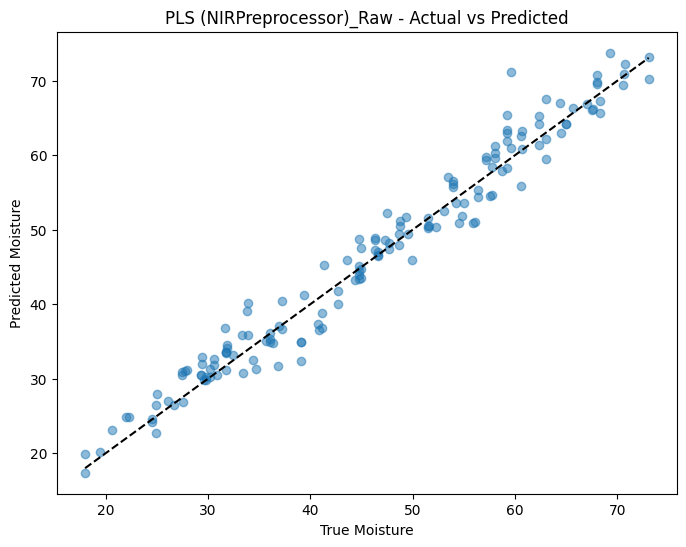

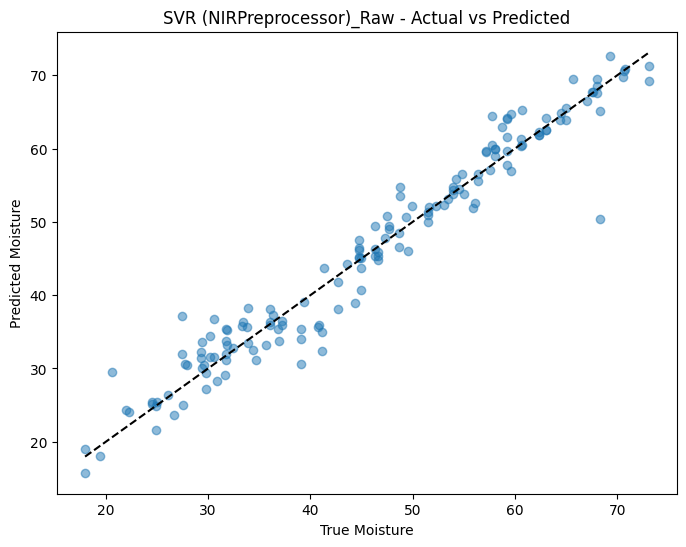

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/stepWARNING:tensorflow:6 out of the last 12 calls to <function TensorFlowTrainer.make_predict_function.<locals>.one_step_on_data_distributed at 0x0000023DFF75C720> triggered tf.function retracing. Tracing is expensive and the excessive number of tracings could be due to (1) creating @tf.function repeatedly in a loop, (2) passing tensors with different shapes, (3) passing Python objects instead of tensors. For (1), please define your @tf.function outside of the loop. For (2), @tf.function has reduce_retracing=True option that can avoid unnecessary retracing. For (3), please refer to https://www.tensorflow.org/guide/function#controlling_retracing and https://www.tensorflow.org/api_docs/python/tf/function for  more details.
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
4/4 ━━━━

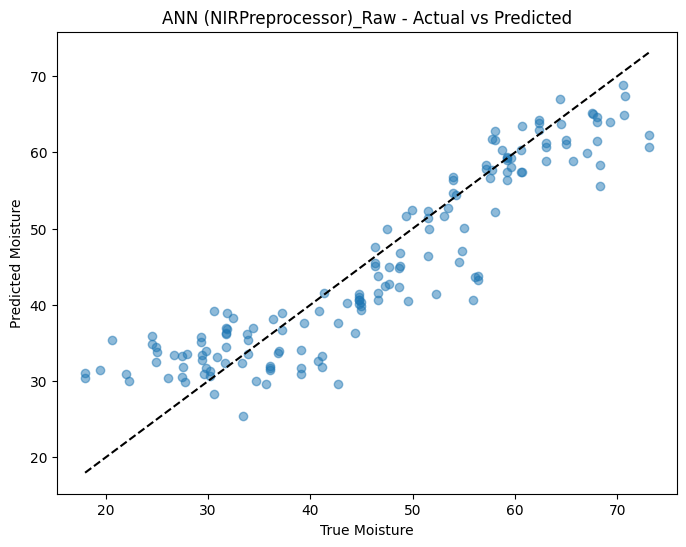

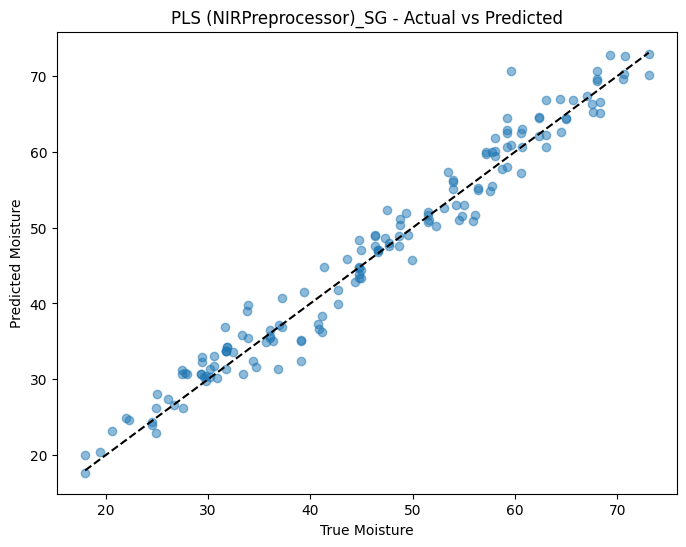

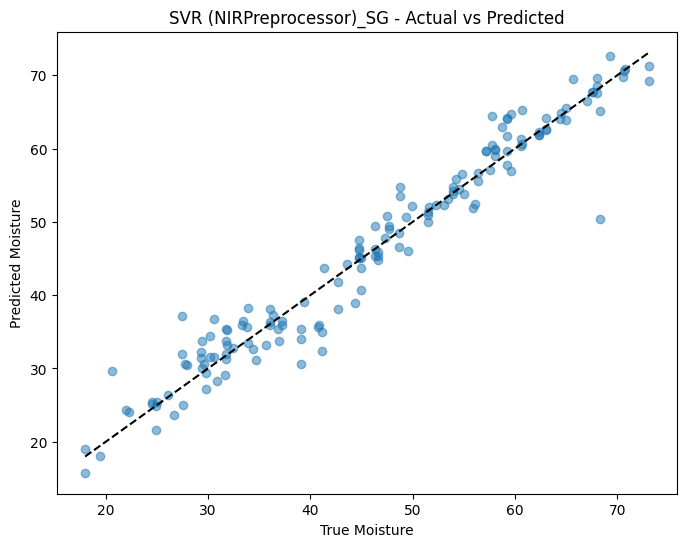

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


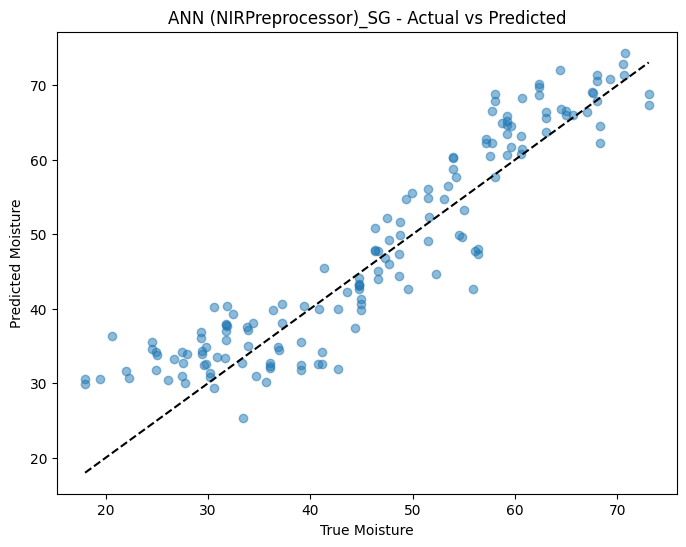

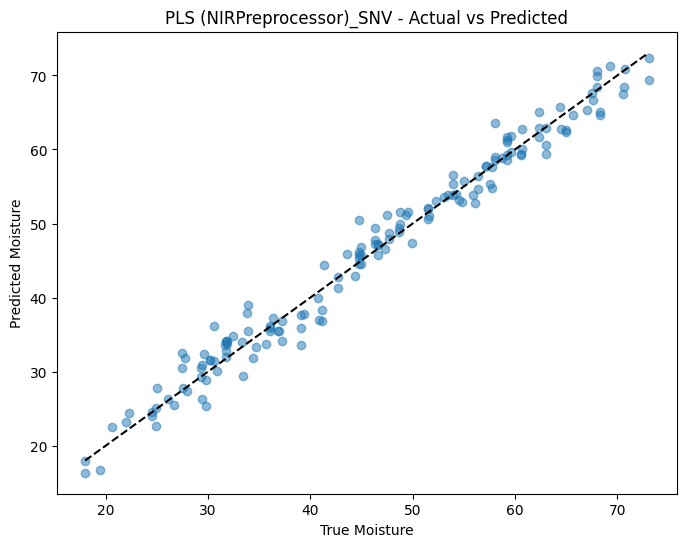

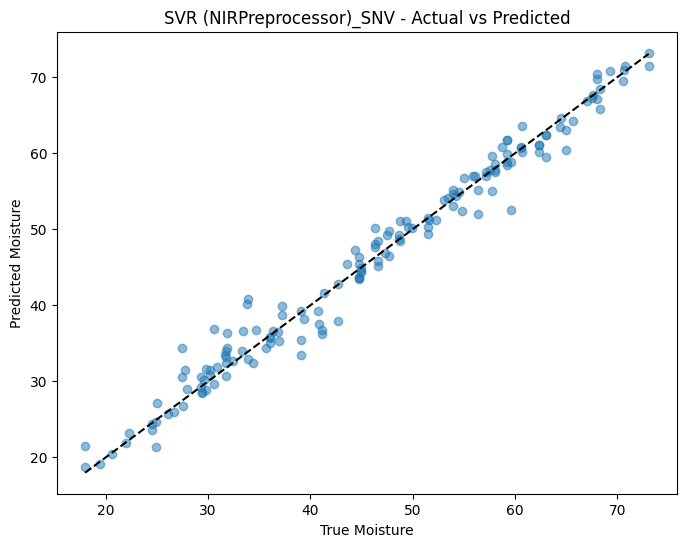

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


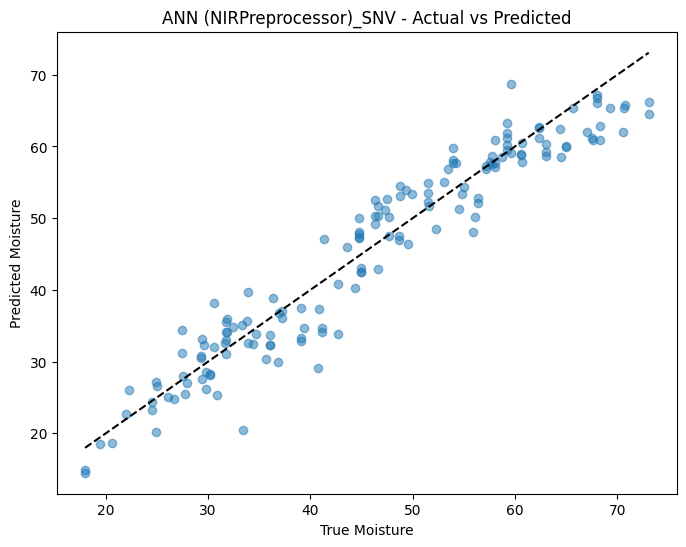

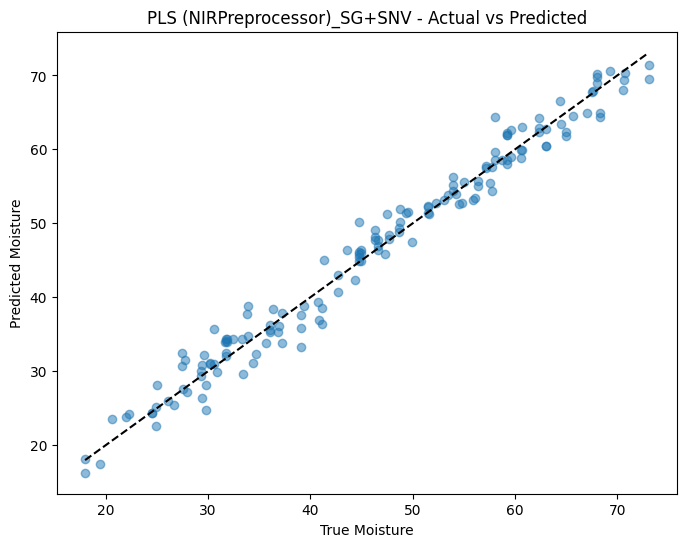

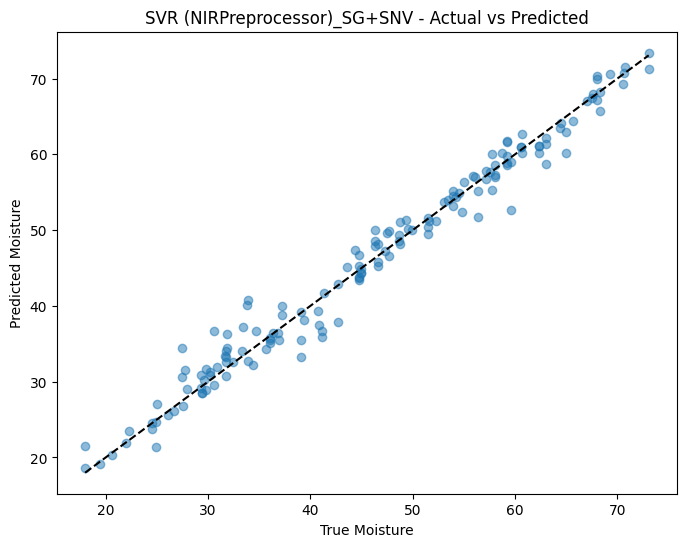

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


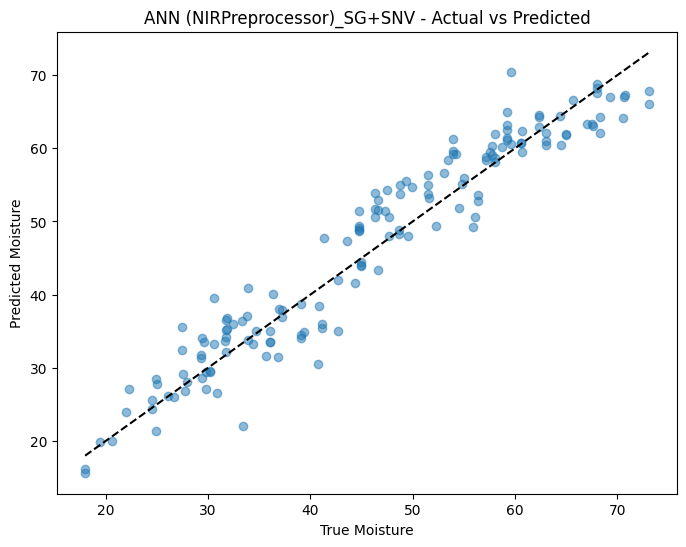

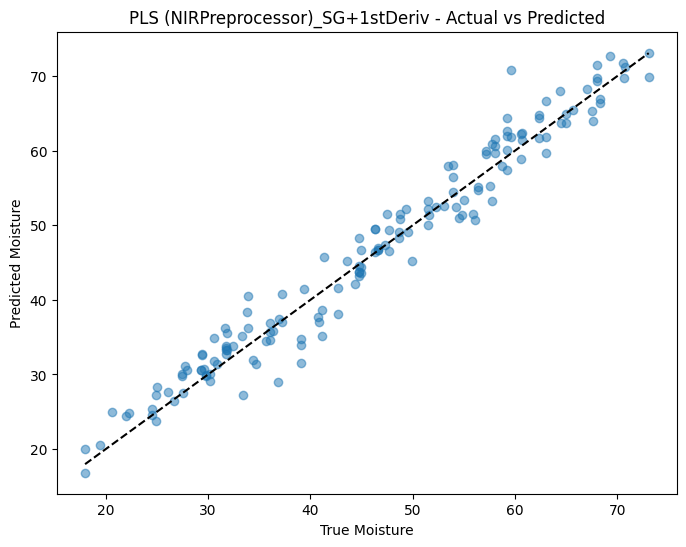

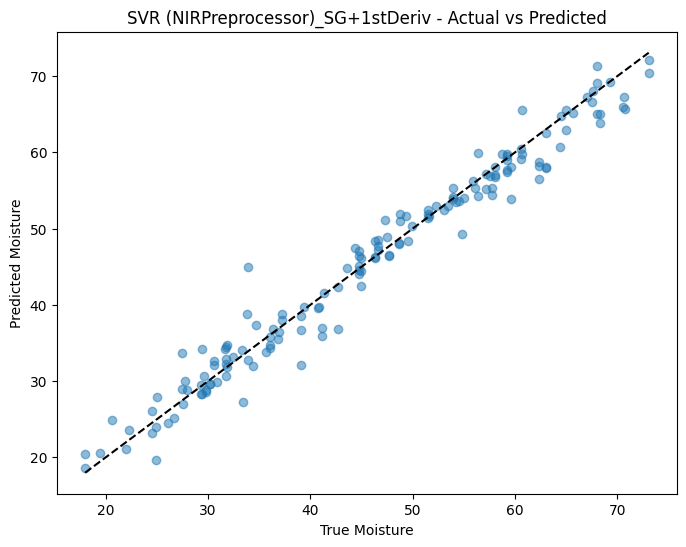

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


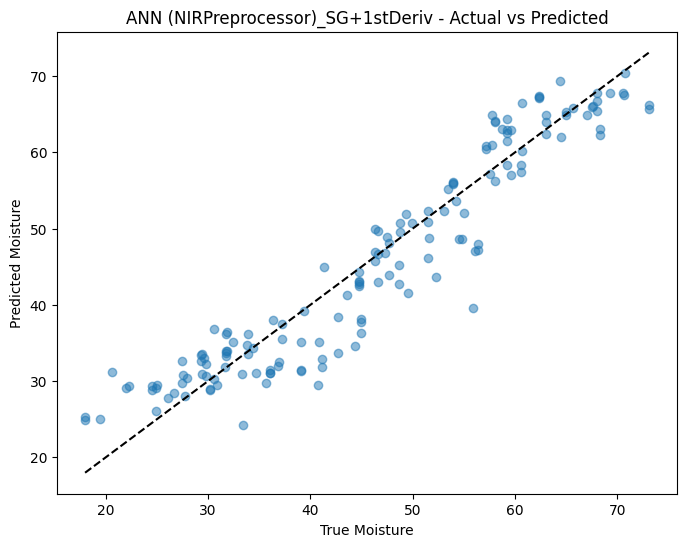

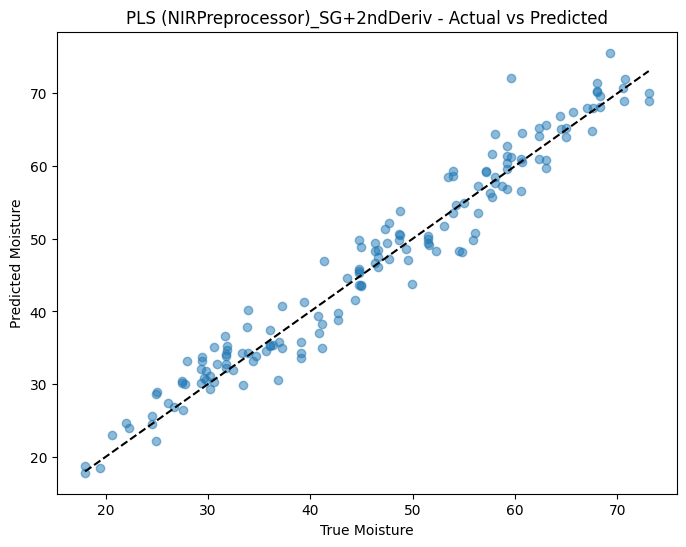

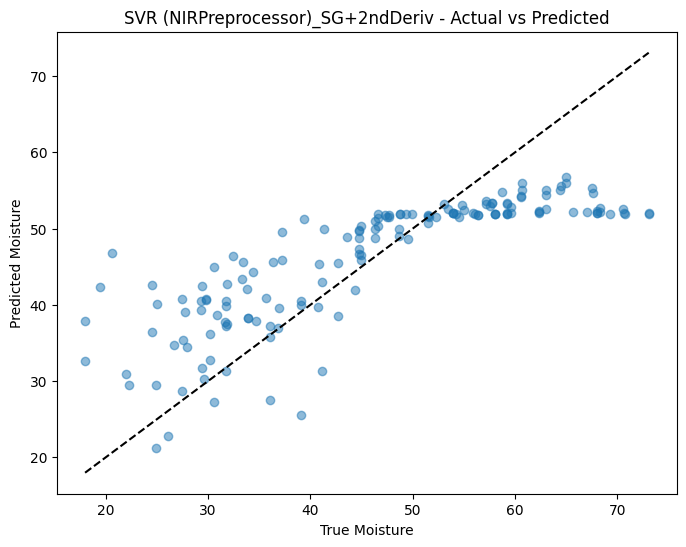

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


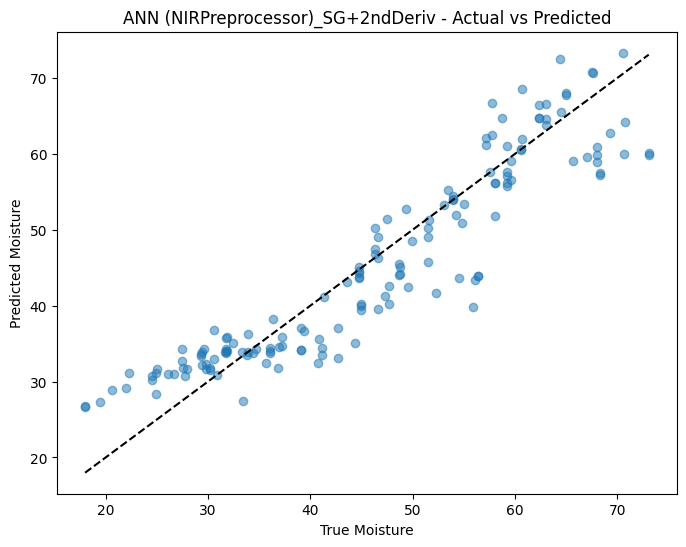

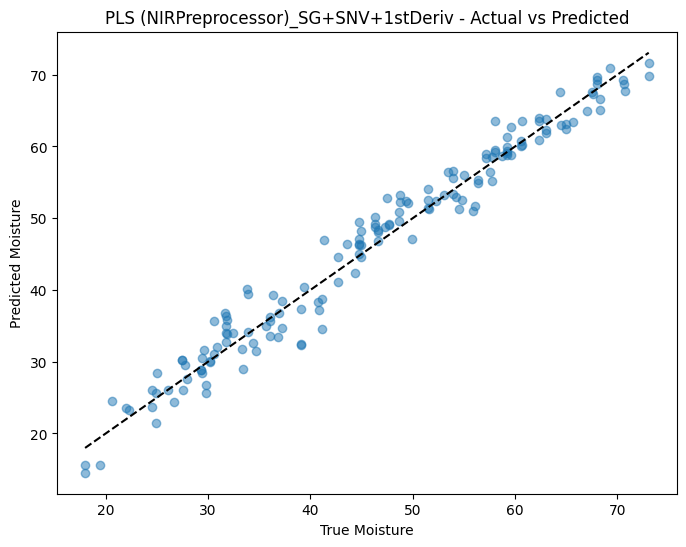

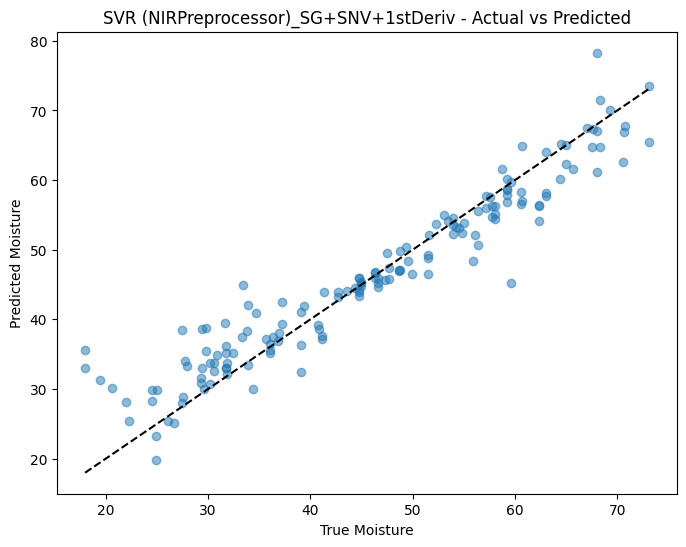

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


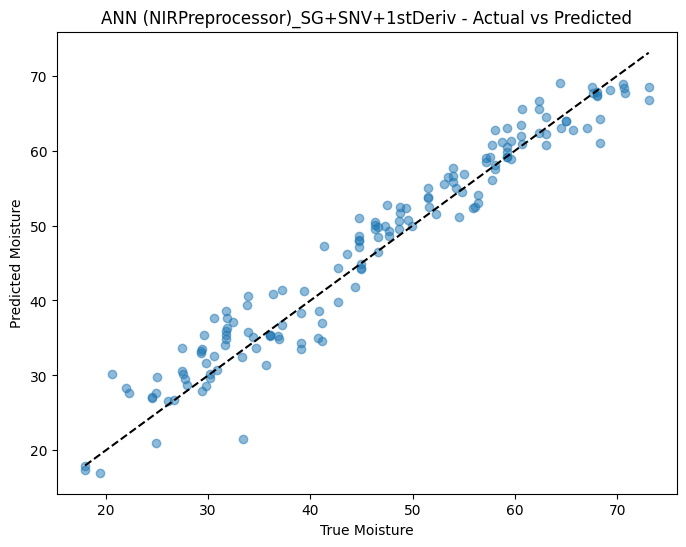

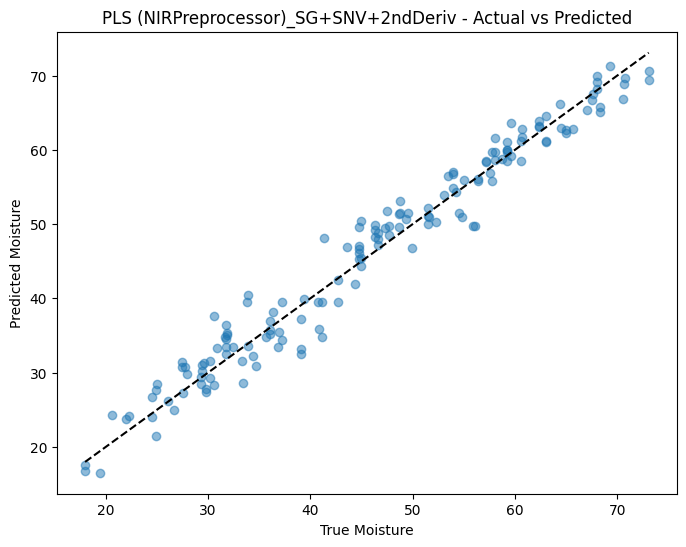

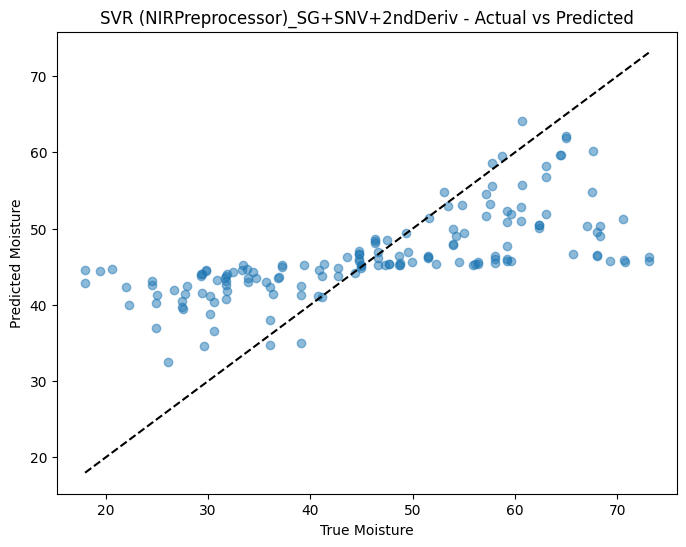

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


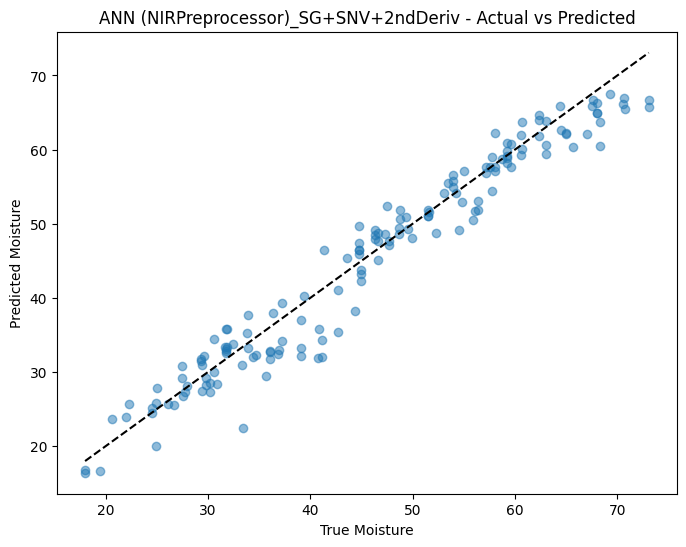

     Preprocessing Model     RMSECV      R2CV  RMSE_test   R2_test
0              Raw   PLS   2.761488  0.970050   2.659668  0.965082
1              Raw   SVR   3.329321  0.975732   3.191873  0.949710
2              Raw   ANN   5.621636  0.844480   5.794510  0.834260
0               SG   PLS   2.751254  0.968620   2.595997  0.966734
1               SG   SVR   3.333581  0.975596   3.195864  0.949584
2               SG   ANN   5.337949  0.863252   5.518709  0.849662
0              SNV   PLS   2.461186  0.978307   2.128160  0.977644
1              SNV   SVR   2.270929  0.995564   2.147867  0.977228
2              SNV   ANN   3.761335  0.929477   3.995676  0.921191
0           SG+SNV   PLS   2.426457  0.976278   2.204212  0.976017
1           SG+SNV   SVR   2.291508  0.994768   2.178501  0.976573
2           SG+SNV   ANN   3.879931  0.937328   3.951739  0.922915
0      SG+1stDeriv   PLS   2.845467  0.969234   2.818440  0.960789
1      SG+1stDeriv   SVR   2.521938  0.999748   2.563412  0.96

In [19]:
def main():
    # Load data
    X_raw = df.iloc[:, 2:-1].values
    y = df['Moisture'].values
    
    # Define preprocessing combinations
    preprocessing_methods = [
        ('Raw', NIRPreprocessor(apply_sg=False, apply_snv=False, apply_derivative=None)),
        ('SG', NIRPreprocessor(apply_sg=True, apply_snv=False, apply_derivative=None)),
        ('SNV', NIRPreprocessor(apply_sg=False, apply_snv=True, apply_derivative=None)),
        ('SG+SNV', NIRPreprocessor(apply_sg=True, apply_snv=True, apply_derivative=None)),
        ('SG+1stDeriv', NIRPreprocessor(apply_sg=True, apply_snv=False, apply_derivative=1)),
        ('SG+2ndDeriv', NIRPreprocessor(apply_sg=True, apply_snv=False, apply_derivative=2)),
        ('SG+SNV+1stDeriv', NIRPreprocessor(apply_sg=True, apply_snv=True, apply_derivative=1)),
        ('SG+SNV+2ndDeriv', NIRPreprocessor(apply_sg=True, apply_snv=True, apply_derivative=2))
    ]
    
    all_results = []
    
    for name, preprocessor in preprocessing_methods:
        X_processed = preprocessor.preprocess(X_raw)
        results = evaluate_models(X_processed, y, preprocessor, name)
        results['Preprocessing'] = name
        all_results.append(results)
    
    # Combine and display results
    final_results = pd.concat(all_results)
    print(final_results[['Preprocessing', 'Model', 'RMSECV', 'R2CV', 'RMSE_test', 'R2_test']])
    
    # Save results
    final_results.to_csv('model_comparison_results.csv', index=False)

if __name__ == "__main__":
    main()